**Scientific Computation (MKP3303)**


>> R.U.Gobithaasan (2021). Scientific Computing, Lectures for Undergraduate Degree Program B.Sc (Applied Mathematics), Faculty of Ocean Engineering Technology & Informatics, University Malaysia Terengganu.
https://sites.google.com/site/gobithaasan/LearnTeach

<p align="center">
     © 2021 R.U. Gobithaasan All Rights Reserved.

</p>



**Chapter 6: Solution of Equation: Differentiation**   

1. Limits 
2. Differentiation: derivatives and ODEs(Analytical and Numerical Solutions).                                                
3. Analytical Solutions of equation(s)
4. Numerical Solutions of equation(s)


References: 
-  [SciPy Lecture Notes](http://scipy-lectures.org/)
- Robert Johansson, Numerical Python: Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib (2019, Apress).


In [1]:
from IPython.display import IFrame
doc = IFrame(src = 'https://docs.sympy.org/latest/modules/core.html?highlight=diff#sympy.core.function.diff', width=1155, height=400)
display(doc)

In [2]:
import sympy
print(sympy.__version__)

sympy.init_printing() # to print out mathematical equations

1.10.1


# Limits

- Natural phenomena can be represented in the form of **functions**, which may depend on one or many independent variables.
- **Limits** denotes the value of a function as one of its variables approaches a specific value or as the value of the variable approaches to negative or positive infinity. 

- We can use limits is to find the **asymptotic behavior** as a function. Asymptotic behavior describes how a function behaves near a limit.

- An example of a limit computations is
$\displaystyle \lim_{x\to \pi/2} f(x)%$, where $ f(x) = \tan(x)$

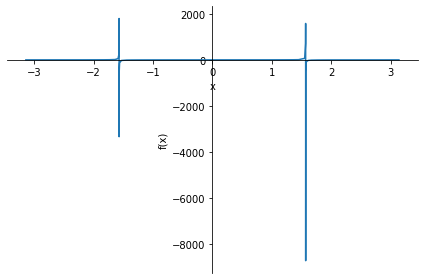

In [3]:
x = sympy.Symbol('x')
g1 = sympy.tan(x)
sympy.plot(g1, (x, -1 *sympy.pi, sympy.pi))
sympy.limit(g1, x, sympy.pi/2)

In [11]:
g1.subs(x,sympy.pi/2 - 0.00001), g1.subs(x,sympy.pi/2 + 0.00001)

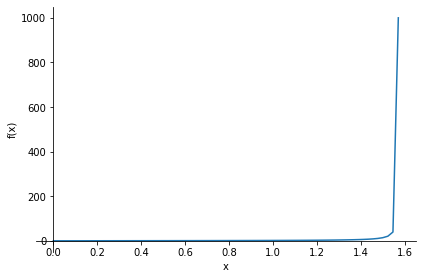

In [15]:
sympy.plot(g1, (x,0 , sympy.pi/2  - 0.001))

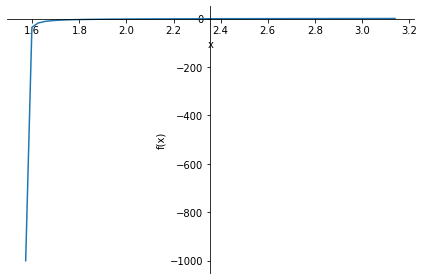

In [16]:
sympy.plot(g1, (x, sympy.pi/2 + 0.001, sympy.pi))

example: 

$\displaystyle \lim_{x\to 10} f(x)%$, where $f(x) = {\sinh (x)+1}$

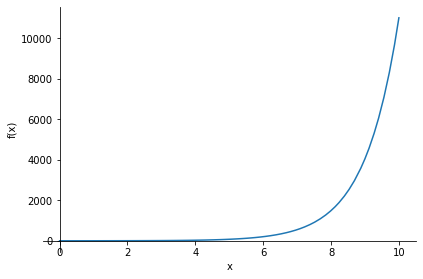

In [17]:
g2 = (sympy.sinh(x)+1)
sympy.plot(g2, (x, 0, 10))
sympy.limit(g2, x, 10)

In [18]:
sympy.N(_)

example: 

$\displaystyle \lim_{x\to \infty} f(x)%$, where $ f(x) = \tan(x)$, where $f(x) = \frac{\sinh (x)}{\exp (x)}$

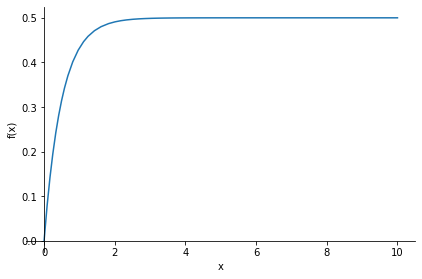

In [19]:
g3 = (sympy.sinh(x))/sympy.exp(x)
sympy.plot(g3, (x, 0, 10))
sympy.limit(g3, x, sympy.oo)

### Limit as Differentiation operator

- The rate of change of gradient for f(x), which also indicates the tangent direction: 
$$
\displaystyle \frac{d}{d x} f{\left(x \right)} =  \lim_{x\to 0} \frac{
\Delta y}{\Delta x}%$,
$$

- The definitions of the derivative is in fact can be represented in the form of limit:

$$
\displaystyle \frac{d}{d x} f{\left(x \right)} =  \lim_{h\to 0} \frac{(f(x + h) - f(x))}{h}%$,
$$


In [21]:
x, h = sympy.symbols("x, h")
f = sympy.Function('f')
limit_h = (f(x + h) - f(x))/h
limit_h

In [22]:
mydiff = limit_h.subs(f, sympy.sin) # substitude f(x) = sin(x)
mydiff

In [11]:
sympy.limit(mydiff,h,0)

# Differentiation: Derivatives

## Derivatives

 - Derivatives $\frac{d}{dx} f(x)$ are the rate of change of the function f(x) with respect to its independent variable x.
- We differentiate using `sympy.diff` or alternatively by using the diff method of SymPy expression instances. 
- The **order** of differentiation is the number of derivative respect to the independent variable.


###  Arbitrary functions with a single independent variable

- The argument to these functions is a number of symbols. For example, the first-order derivative of a function f (x) with respect to x:
- the derivative of a function with ONE independent variables are called ordinary derivatives.

In [23]:
x = sympy.Symbol('x')
f = sympy.Function('f')(x)
sympy.diff(f, x, 0) # original function wihout derivative computation

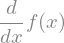

In [13]:
sympy.diff(f, x, 1) # first derivative computation

In [14]:
type(_)

sympy.core.function.Derivative

- Higher order: Two ways to compute the second-order derivative of a function f (x) with respect to x:

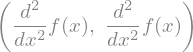

In [15]:
sympy.diff(f, x, x) , sympy.diff(f, x, 2)

- Higher order: Two ways to compute the third-order derivative of a function f (x) with respect to x:

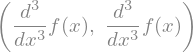

In [16]:
sympy.diff(f, x, x, x) , sympy.diff(f, x, 3)

#### Functions defined 

 -  example: $\frac{d}{d x} f{\left(x \right)}$, where $f(x) = sin(x)$

In [17]:
x = sympy.symbols('x')
f_sol = sympy.diff(sympy.sin(x), x,1)
f_sol

- We can always
double-check: 
$$
\int cos(x) dx  = sin(x) + C_1
$$
where $C_1$ is the integration constant.

In [18]:
sympy.integrate(f_sol)

In [24]:
x = sympy.symbols('x')
f1 = sympy.sin(x)
sympy.diff(f1, x,1)

In [20]:
f1.diff(x), f1.diff(x,2)  # short way

 - evaluating the derived function using `subs`

In [25]:
x = sympy.symbols('x')
f2 = 3*x**2
f2.diff(x,1)

In [22]:
_.subs(x, sympy.pi)

In [23]:
f2.diff(x).subs(x, sympy.pi) 

###  Functions with multiple variables

- the derivative of a function with several independent variables are called **partial derivatives**.

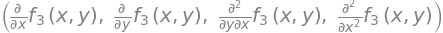

In [26]:
x,y = sympy.symbols('x,y')
f3 = sympy.Function('f3')(x,y)
sympy.diff(f3, x), sympy.diff(f3, y), sympy.diff(f3, x, y),  sympy.diff(f3, x, x)

$\frac{\partial}{\partial x} f_4(x,y) =(x + 1)^3 + xy ^ 2$

In [27]:
x,y = sympy.symbols('x,y')
f4 =(x + 1)**3 + x*y ** 2
sympy.diff(f4, x), sympy.diff(f4, y), sympy.diff(f4, x, y)

In [26]:
f4.diff(x,y)

### Delayed differentiation

 - declaring the derivatives with repsect to its variable

$cos(x) + xy^2$

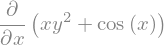

In [27]:
f5 = sympy.Derivative(sympy.cos(x) + x*y ** 2, x)
f5

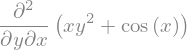

In [28]:
f6 = sympy.Derivative(sympy.cos(x) + x*y ** 2, x,y)
f6

 - evaluating the derivatives.

In [29]:
f5.doit(), f6.doit()

## Ordinary Differential Equation (ODE)

- Usually we do not know explicitly the function that represents a phenomena.
- We may only know substantial relations of the variables, which mainly focusing on how it changes; **rate of change with respect to its independent variables, hence we can represent this relation in the form of derivatives**.
- Any equations with unknown function defined in the form of derivatives called differential equations (DE).
- Different equations can be divided into two kinds:
> 1. **Ordinary Differential Equation**: unknown function with a single variable.
> 2. **Partial Differential Equation**: unknown function with several variables.
- In fact, ODE is a special type of PDE!
- The order of an ODE is the highest derivative of the unknown function that appears in the equation.
- The **solution of ODE** is any function which satisfies the ODE. Thus, we may substitute the function along with its derivatives to inspect if it is true. 

Example: 
\begin{align*}
\frac{d}{d x} y(x) &= 2 x \\
y' &= 2 x \\
\Rightarrow y'- 2 x &= 0
\end{align*}

A standard way to represent the ODE is, in the form a function with x and y' as its argument:
$$
f(x,y') = y' - 2x 
$$

In [29]:
x = sympy.symbols("x")
y = sympy.Function("y")
ode1 = y(x).diff(x) - 2*x
sympy.Eq(ode1,0) # ODE equation = 0

In [34]:
ode_sol1 = sympy.dsolve(ode1)
ode_sol1 # C1 is the integration constant

In [32]:
type(ode_sol1)

sympy.core.relational.Equality

In [33]:
ode_sol1.free_symbols

- accessing left-hand-side (lhs) and right-hand-side (rhs) of the solution:

In [34]:
 ode_sol1.lhs , ode_sol1.rhs 

- check: 
\begin{align*}
\frac{d}{d x} y{\left(x \right)} &= \frac{d}{d x} (C_1 + x^2) \\
\Rightarrow  y' &= 2x 
\end{align*}

In [35]:
sympy.diff(ode_sol1.rhs,x) == 2*x

True

### First Oder ODE with an Initial condition: trivial example

- We need to use the given initial conditions (IC) to find the values of the integration constants. 


- **ODE order one:**

\begin{align*}
y'- 2x &= 0 \tag{1}\\
y' &= 2x \\
 \int y'\ dx &= \int 2x\ dx\\
\Rightarrow y{\left(x \right)} &= C_{1} + x^{2} \tag{2}
\end{align*}

- We can always verify the answer by substituting in the derived function back into the ODE: (2) into (1)

\begin{align*}
\frac{d}{dx}(C_{1} + x^{2}) - 2x &= 0\\
2x-2x =0
\end{align*}

-  How do we identify what is the integration constant $C_1$? 
- It depends on the given initial condition, for example:
given initial condition (IC): 
$$y(0) = y_0 \tag{3}$$

\begin{align*}
y(x) &= C_{1} + x^{2} \tag{1} \\
y(0) &= C_{1} \\
\Rightarrow C_{1} &= y_0 
\end{align*}

In [36]:
ode_sol1 # C1 is the integration constant

In [31]:
sympy.Eq(ode1,0) # from above

example:    
$$y'- 2x = 0
$$
with initial condition (IC) as $y(0) = y_0$

In [38]:
ode_sol1.subs(x,0)


- Let the initial condition is $y(0) = y_0$, we describes the IC using a **dictionary**, which can be substituted later:
> `IC = {y(0):  y0}` 

In [32]:
y0 = sympy.Symbol('y0')
IC = {y(0): y0}
IC

 - substituting into analytical solution

In [35]:
y_eq = ode_sol1.subs(x, 0).subs(IC)
y_eq

- solving for $C_1$

In [39]:
c1 = sympy.solve(y_eq)
c1

In [42]:
c1[0]

- substituting $C_1$ into analytical solution

In [44]:
y_sol = ode_sol1.subs(c1[0])
y_sol

### Using lamdify:
- This module provides convenient functions to transform SymPy expressions to lambda functions which can be used to calculate numerical values very fast.
- Specifies the numeric library to use.

           - If not specified, modules defaults to:

           - ["scipy", "numpy"] if SciPy is installed

           - ["numpy"] if only NumPy is installed

           - ["math", "mpmath", "sympy"] if neither is installed.
 
 - f = lambdify(x, expr, 'numpy', moduleName)

In [43]:
sympy.exp

exp

In [43]:
t = sympy.Symbol('t')
f = sympy.lambdify(t, sympy.exp(t), modules=["sympy"])
f(t), f(0)

### **Direction Field for order 1 ODE** 
by Robert Johansson, Numerical Python: Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib (2019, Apress).

- We can produce the direction field graphs for the ODEs on the form $\frac{dy(x)}{dx} = f (x,y(x))$ 
- Below is the defintion function to plot direction field.


In [45]:
import matplotlib.pyplot as plt

def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
        f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
        x_vec = np.linspace(x_lim[0], x_lim[1], 20)
        y_vec = np.linspace(y_lim[0], y_lim[1], 20)
        
        if ax is None:
            _, ax = plt.subplots(figsize=(4, 4))
             
        dx = x_vec[1] - x_vec[0]
        dy = y_vec[1] - y_vec[0]
        
        for m, xx in enumerate(x_vec):
            for n, yy in enumerate(y_vec):
                Dy = f_np(xx, yy) * dx
                Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
                Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
                ax.plot([xx - Dx/2, xx + Dx/2],
                        [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
        
        ax.axis('tight')
        ax.set_title(r"$%s$" %
                    (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
                    fontsize=18)
        return ax

Example: 
\begin{align*}
\frac{d}{d x} y(x) &= 2 x \\
\end{align*}

with IC y(0)=1

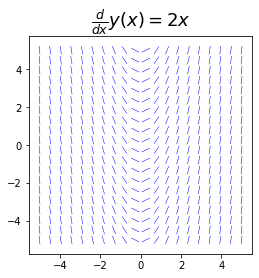

In [75]:
import numpy as np
x_vec = np.linspace(-4, 4, 100)
x = sympy.symbols("x") 
y = sympy.Function("y")

plot_direction_field(x, y(x), 2*x); 

In [77]:
ode1 = y(x).diff(x) - 2*x
sympy.Eq(ode1,0)
y0 = sympy.Symbol('y0')
IC = {y(0): y0}
y_eq = ode_sol1.subs(x, 0).subs(IC)
c1 = sympy.solve(y_eq)
y_sol = ode_sol1.subs(c1[0])

In [78]:
y_sol, y_sol.subs(y0,1)

In [79]:
y0 = sympy.symbols("y0")
y = sympy.Function("y")
y_sol.subs(y0,1)
y_x = sympy.lambdify(x, y_sol.rhs.subs(y0,1),'numpy')

y_x(-3), y_x(6) #compute y at x= -3 and x =6, respectively

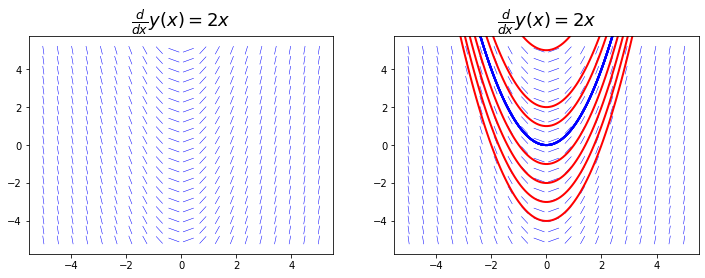

In [80]:
import numpy as np
x_vec = np.linspace(-4, 4, 100)
x = sympy.symbols("x") 
y = sympy.Function("y")

# direction field without solution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_direction_field(x, y(x), 2*x, ax=axes[0]); # using the direction field function
plot_direction_field(x, y(x), 2*x, ax=axes[1]);
y0, y0_val= sympy.symbols('y0,y0_val')

# direction field with solution
for y0_val in [-4, -3, -2, -1,  1, 2, 5]: # ICs
    y_x = sympy.lambdify(x, y_sol.rhs.subs(y0,y0_val))
    axes[1].plot(x_vec, y_x(x_vec), 'r', lw=2)
    axes[1].plot(x_vec, sympy.lambdify(x, y_sol.rhs.subs(y0,0))(x_vec), 'b', lw=2) # IC y(0)=0
    

Example: 
\begin{align*}
\frac{d}{d x} y(x) &= 2 \exp{x} \\
\end{align*}
with initial condition (IC) as $y(0) = y_0$

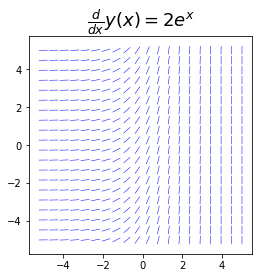

In [86]:
x_vec = np.linspace(-4, 4, 100)
x = sympy.symbols("x")
y = sympy.Function("y")

plot_direction_field(x, y(x), 2*sympy.exp(x));

In [88]:
x = sympy.symbols("x")
y = sympy.Function("y")
odeExp = y(x).diff(x) - 2*sympy.exp(x)
sympy.Eq(odeExp,0) # creating ODE equation = 0 . By default: sympy.Eq(lhs, rhs=None, **options)

In [89]:
ode_solExp = sympy.dsolve(odeExp)
ode_solExp # C1 is the integration constant


- Let the initial condition is $y(0) = y_0$, we describes the IC using a **dictionary**, which can be substituted later:
> `IC = {y(0):  y0}` 

In [90]:
y0 = sympy.Symbol('y0')
IC = {y(0): y0}
IC

 - substituting into analytical solution

In [91]:
y_eq = ode_solExp.subs(x, 0).subs(IC)
y_eq

- solving for $C_1$

In [92]:
c1 = sympy.solve(y_eq)
c1

- substituting $C_1$ into analytical solution

In [93]:
y_sol = ode_solExp.subs(c1[0])
y_sol

In [94]:
y0 = sympy.symbols("y0")
y = sympy.Function("y")
y_sol.subs(y0,1)

In [95]:
y_x = sympy.lambdify(x, y_sol.rhs.subs(y0,1),'numpy')
y_x(-3), y_x(6)

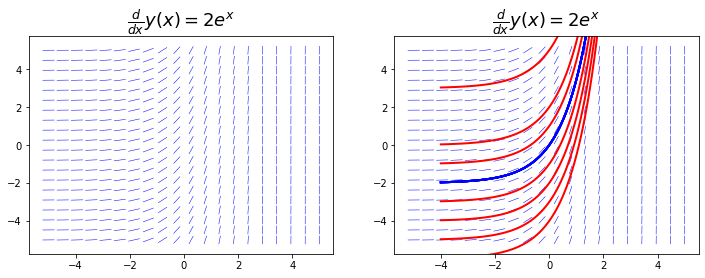

In [96]:
import numpy as np
import matplotlib.pyplot as plt
x_vec = np.linspace(-4, 4, 100)
x = sympy.symbols("x")
y = sympy.Function("y")

# direction field without solution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_direction_field(x, y(x), 2*sympy.exp(x), ax=axes[0]);
plot_direction_field(x, y(x), 2*sympy.exp(x), ax=axes[1]);
y0, y0_val= sympy.symbols('y0,y0_val')

# direction field without solution
for y0_val in [-4, -3, -2, -1,  1, 2, 5]:
    y_x = sympy.lambdify(x, y_sol.rhs.subs(y0,y0_val))
    axes[1].plot(x_vec, y_x(x_vec), 'r', lw=2)
    axes[1].plot(x_vec, sympy.lambdify(x, y_sol.rhs.subs(y0,0))(x_vec), 'b', lw=2)
    

**Newton's Law Of Cooling** : Example of ODE physical problem

\begin{align*}
\frac{dy}{d t} &=k[y(t)-Ta], IC: y(0)=180 \\
y'(t)&=k[y(t)-Ta] , k=-0.0733013\\ 
\end{align*}

Newtons's Law Of Cooling introduct a hot object into cool surrounding, cause the rate of cooling of the object is not proportional to its temperature, but rather, to the difference in temperature between the object and its
surroundings.

Let:
- Ta = temperature of the surrounding of an object / ambient temperature
- y(t) = temperature of an object at time t
- t = time
- k = constant
> Constant k is a proportional constant since the rate of change of temperature, T of the object is directly proportional to the difference in temperature between the object and its surroundings

Ref: [Wiki](https://en.wikipedia.org/wiki/Newton%27s_law_of_cooling)

---
**Example: ODE Order one**
\begin{align*}
\frac{d}{d x} y{\left(x \right)} = x + y^{2}{\left(x \right)}\\
\Rightarrow f (x,y(x)) = x + y^{2}
\end{align*}

- One way to inspect the solution is, we investigate the direction field

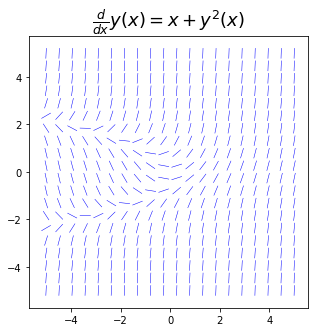

In [56]:
x = sympy.symbols("x") # independent variable
y = sympy.Function("y") # dependent
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
plot_direction_field(x, y(x), y(x)**2 + x, ax=axes);

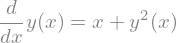

In [57]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x
sympy.Eq(y(x).diff(x), f)


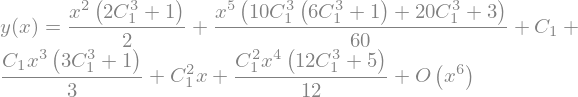

In [58]:
sympy.dsolve(y(x).diff(x) - f)

---
#### No analytical solution: ODE order two

Example: 
\begin{align*}
\frac{d^{2}}{d x^{2}} y{\left(x \right)} = x + y^{2}{\left(x \right)}\\
\end{align*}

In [59]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x

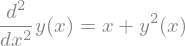

In [60]:
sympy.Eq(y(x).diff(x, x), f)

In [61]:
#sympy.dsolve(y(x).diff(x, x) - f)
#NotImplementedError: solve: Cannot solve -x - y(x)**2 + Derivative(y(x), (x, 2))

---

### Numerical Solution with SciPy

- There are many approaches to solving ODEs numerically, for example, Euler and Runge-Kutta's method. 

- We write ODEs on the standard form:
$$
\frac{d}{d x} y{\left(x \right)} = f (x,y(x)), 
$$
where y(x) is a array of unknown dx functions of x. 

- SciPy provides functions for the numerical integration of ODE problems. SciPy provides two ODE solver interfaces:
     1. `integrate.odeint`: based on [LSODA solver from ODEPACK](http://computation.llnl.gov/casc/odepack) (Adams predictor-corrector  and BDF method), 
         - easier to use.
     2. `integrate.ode`: based on various solvers: [VODE, ZVODE, LSODA and etc.](http://www.netlib.org/ode) (fourth- and eighth- order Dormand-Prince methods (i.e., types of Runge-Kutta methods) with adaptive stepsize).
         - object-oriented interface more flexible.

In [62]:
from scipy import integrate
#integrate.odeint?

Example: 
$$
y'= f (x,y(x)) = x + y^{2}
$$

In [98]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x
sympy.Eq(y(x).diff(x), f)

In [99]:
import numpy as np
from scipy import integrate

f_np = sympy.lambdify((y(x), x), f) # a function of two arguments: f_np(y,x)

In [100]:
f_np(2,0), f_np(2,2),

In [101]:
y0 = 0 # Initial condition y(0)=0
#points to compute:  x is positive
xp = np.linspace(0, 1.9, 100)
yp = integrate.odeint(f_np, y0, xp) # SciPy's numerical ODE computation

In [67]:
#yp

In [102]:
#points to compute:  x is negative
xm = np.linspace(0, -5, 100) 
ym = integrate.odeint(f_np, y0, xm)

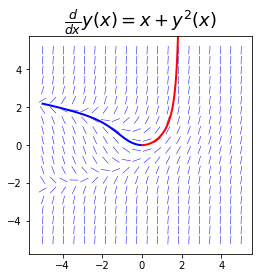

In [104]:
import matplotlib.pyplot as plt
plot_direction_field(x, y(x), f,)
plt.plot(xm, ym, 'b', lw=2)
plt.plot(xp, yp, 'r', lw=2)

### Higher order ODE

**example: ODE Order 2:**     
$$y''- 3 x^2 = 0
$$
with initial conditions: 
> 1. $y(0) = y_0$,  
> 2. $y'(0) = y_1$ 

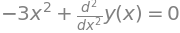

In [106]:
x, y, y0, y1 = sympy.symbols("x, y, y_0, y_1")
y = sympy.Function("y")
ode2 = y(x).diff(x,2) - 3*x**2
sympy.Eq(ode2,0)

In [107]:
ode_sol2 = sympy.dsolve(ode2)
ode_sol2 # C1 & C1 are integration constants

- Since we derived the general solution as $y(x)$, we can substitute IC into this equation to solve for $C_1$ and $C_2$:
\begin{align*}
y(x) &= C_{1} + C_{2} x + \frac{x^{4}}{4} \\
IC1: y(0) &= C_{1} \\
\Rightarrow C_{1} &= y_0 
\end{align*}


\begin{align*}
y(x) &= C_{1} + C_{2} x + \frac{x^{4}}{4} \\
y'(x) &= C_{2} + x^{3} \\
IC2: y'(0) &= y_1 \\
\Rightarrow C_{2} &= y_1 
\end{align*}

- declare initial conditions as dict

In [129]:
IC2 = {y(0): y0, y(x).diff(x).subs(x, 0): y1}
IC2

⎧          ⎛d       ⎞│       ⎫
⎨y(0): y₀, ⎜──(y(x))⎟│   : y₁⎬
⎩          ⎝dx      ⎠│x=0    ⎭

- manually differentiate twice the solution to verify the ODE

In [130]:
ode_sol2.lhs.subs(x,0).subs(IC2)- ode_sol2.rhs.subs(x,0).subs(IC2) #substitude the ICs into the solution, at x = 0

In [131]:
ode_sol2.lhs.diff(x, 1)-ode_sol2.rhs.diff(x, 1) #first derivative of the solution

In [137]:
ode_sol2.lhs.diff(x, 1).subs(x,0).subs(IC2)- ode_sol2.rhs.diff(x, 1).subs(x,0).subs(IC2) #substitude the ICs into the first deri of solution, at x = 0

- general equation setup to solve integration constant $C_i$

In [138]:
sol = ode_sol2 # your analytical solution
eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(IC2) for n in range(len(IC2))]
eqs

- solving for $C_i$

In [77]:
c_sol2 = sympy.solve(eqs, ode_sol2.free_symbols)
c_sol2 

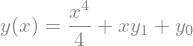

In [78]:
ode_sol2.subs(c_sol2)

<div class="alert alert-block alert-success">
<b>Take note:</b> To solve this method numerically using SciPy, first you need to express second order ODE into a system of first order.
</div>

- See [SciPy Notes](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) for an example of **the second order differential equation for the angle theta of a pendulum acted on by gravity with friction**


---
# Analytical Solution of Equation(s)

- We can classify equations based the **number of independent variables:**
1. single : univariate, $f(x)$, where $x$ is an independent variable. If we apply differentiation, we may end up with an ODE.
2. more than one : multivariate, $f(x_1,x_2, x_i)$, where $x_1,x_2, x_i$ are independent variables. If we apply differentiation, we may end up with a PDE.

- We may further classify the type of equation or in genereal, the functions into:
1. **linear equations**: we can express them into a summation of its terms; visually it is a **straight line in 2D or a plane in 3D. In general, it is a hyperplane in $R^d$**.
2. **nonlinear equations**: Those equations which cannot be represented as linear equations are **nonlinear equations**. For example, the independent variables $x_i^{\alpha}$ are usually with $\alpha \neq 0$.


- There are either analytical or numerical approach of finding a solution for a given function in Python. 
- A collection of functions are called a system. Linear systems usually can be solved analytically using SymPy or SciPy, otherwise we will try to use numerical approach to solve the system.

- Below are the modules that we will go through:
> 1. Linear Systems: SymPy / SciPy : `scipy.linalg`
> 2. Nonlinear Systems: SciPy: `scipy.optimize`


In [79]:
from IPython.display import IFrame
doc = IFrame(src = 'https://docs.sympy.org/latest/modules/solvers/solvers.html', width=1155, height=400)
display(doc)

In [2]:
import sympy
print(sympy.__version__)

sympy.init_printing() # to print out mathematical equations

1.10.1


- We can solve linear and nonlinear equation with `sympy.solve()` analytically.

- Simple equation: 
\begin{align*}
2x &= 3\\
\Rightarrow f(x): 2x-3 &= 0 \\
\Rightarrow LHS -RHS&= 0
\end{align*}

## Single Variable

In [3]:
x = sympy.symbols("x")
eq1 = 2*x-3;
sol1 = sympy.solve(eq1)
sol1a = sympy.solve(eq1,x)
sol1b = sympy.solve(eq1,x, dict=True)

In [4]:
sol1, sol1a, sol1b

- two ways to verify your answer: 

In [5]:
sol1b[0]

In [6]:
 eq1.subs(sol1b[0]) 

In [7]:
sympy.checksol(eq1, {x:3/2}) #checksol verifies if the expression is zero

True

In [86]:
sympy.checksol(eq1,sol1b[0])

True

### Linear equations

Algebraic simplification of a linear equation:
\begin{align*}
\frac{ax}{b} &= c\\
\Rightarrow f(x): \frac{ax}{b}-c &= 0 \\
\end{align*}
where $a,b,c \in R$.

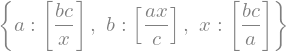

In [87]:
x,a,b,c = sympy.symbols("x,a,b,c")
eq2 = a*x/b - c ;
{a: sympy.solve(eq2,a), b: sympy.solve(eq2,b), x: sympy.solve(eq2,x)}

- **Inequalities**: $\frac{ax}{b} > c \, \text{and} \, x>0  $
- For Mathematica, use `Reduce[]`

In [88]:
x,a,b,c = sympy.symbols("x,a,b,c")
sympy.solve([ x < 2, x > -2],x)

In [8]:
x,a,b,c = sympy.symbols("x,a,b,c")
sympy.solve([ 0 < x, x < 2, x > 1],x)

- finding more than a single variable.

\begin{align*}
f(x): x+b +\sqrt{a} &= 0\\
\Rightarrow  x+b &= ? \\
\end{align*}

In [9]:
x,a,b = sympy.symbols("x,a,b")
sympy.solve(x + b - sympy.sqrt(a), x + b)

- the values of $a$ and $b$ which will result with $x = 0$

In [13]:
eq_a_b = (a + b)*x - b + 2
sol_a_b = sympy.solve(eq_a_b, a, b)
sol_a_b 

In [15]:
sympy.checksol(eq_a_b,sol_a_b)

True

### Nonlinear equation

- a quadratic equation: $f(x) = ax^2 + bx + c$,  where $a,b,c \in R$.

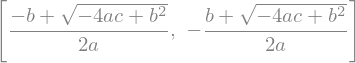

In [92]:
x,a,b,c = sympy.symbols("x,a,b,c")
quadratic_eq = a * x**2 + b * x + c
sol_quad = sympy.solve(quadratic_eq, x)
sol_quad

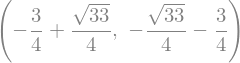

In [93]:
vals = {a: 2, b: 3, c: -3}
sol_quad[0].subs(vals),sol_quad[1].subs(vals)

- a trigonometric equation: $f(x) = a sin(x) - b cos(x)$,  where $a,b\in R$.

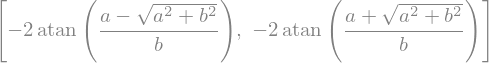

In [94]:
x,a,b = sympy.symbols("x,a,b")
sympy.solve(a* sympy.sin(x) - b *sympy.cos(x), x)

- A root of a polynomial P(x) is a number $x_i$ such that $P(x_i)=0$. 
- The fundamental theorem of algebra states that **a polynomial P(x) of degree n has n roots**, some of which may be degenerate. 
- Finding roots of a polynomial is therefore equivalent to polynomial factorization into factors of degree 1.
- Solving a polynomial: $\left(x^{2} - 2\right) \left(x^{2} + 1\right) = 0$, We can have to up to four roots.

- See an example of my work at [Mathematica Website](https://demonstrations.wolfram.com/CurvatureExtremaForConstrainedBezierCurves/) solving the root on a quintic equation (degree 5).

In [95]:
x = sympy.symbols("x")
poly = sympy.Eq((x**2 + 1)*(x**2 - 2),0)
poly

In [96]:
poly.lhs.expand()

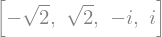

In [97]:
sympy.solve((x**2 + 1)*(x**2 - 2) , x)

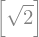

In [98]:
x = sympy.symbols("x", positive =True) # to get only positive value
sympy.solve((x**2 + 1)*(x**2 - 2) , x)

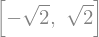

In [99]:
x = sympy.symbols("x", real =True) # to get only real values
sympy.solve((x**2 + 1)*(x**2 - 2) , x)

## Solution for systems of equation

### Linear Systems: Solving with SciPy (Matrix Representation A.x =b)

$$
 x_1 + 3 x_2 = 4
$$

$$
5 x_1  - x_2 = 3
$$

- We can represent a system of (linear) equations above in a matrix form of $A.x =b$

In [24]:
import numpy as np

A = np.array([[1, 3], [5, -1]])
print('Matrix A = ', A)
print(A.shape)

b = np.array([[4], [3]])
print('Matrix b = ', b)
print(b.shape)

Matrix A =  [[ 1  3]
 [ 5 -1]]
(2, 2)
Matrix b =  [[4]
 [3]]
(2, 1)


- When we are solving an equation system Ax = b, we are not computing the inverse of A to solve, as its time consuming.


- We instead use LUsolve method, which performs the LU (Lower Upper) factorization internally and solves the equation system using those factors. 

1. Let's compute **LU decomposition** of Matrix A. We need scipy.linalg to do this

$$
\begin{eqnarray*}
A = \begin{bmatrix}
1 & 3 \\
5 & -1 \\
\end{bmatrix} & =& \begin{bmatrix}
0 & 1 \\
1 & 0 \\
\end{bmatrix}* \begin{bmatrix}
1 & 0 \\
0.2 & 1 \\
\end{bmatrix}*\begin{bmatrix}
5 & -1 \\
0 & 3.2 \\
\end{bmatrix} \\ 
&&\\
& = & P. L . U \\
&&\\
& = & Permutation. Lower . Upper
\end{eqnarray*}$$

In [40]:
from scipy import linalg

P, L, U = linalg.lu(A)
P, L , U # Permutation matrix: diagonal, lower, upper matrices

(array([[0., 1.],
        [1., 0.]]),
 array([[1. , 0. ],
        [0.2, 1. ]]),
 array([[ 5. , -1. ],
        [ 0. ,  3.2]]))

- We can in the decomposition as follows:

In [26]:
np.dot(L,U) # we have obtained flipped A by multipying L*U, but need to multipy P to obtain A in right order.

array([[ 5., -1.],
       [ 1.,  3.]])

In [103]:
 P.dot(np.dot(L,U))

array([[ 1.,  3.],
       [ 5., -1.]])

- Let $UX =Y$, for the vector Y as:
\begin{eqnarray*}
Y = \begin{bmatrix}
y_1  \\
y_2 \\
\end{bmatrix} 
\end{eqnarray*}

- SO, $AX = PL(UX) = PLY = b$, Hence, the next step is to solve $PLY=b$, 

$$
\begin{eqnarray*}
PLY = \begin{bmatrix}
0.2 & 1 \\
1 & 0 \\
\end{bmatrix}  \begin{bmatrix}
y_1  \\
y_2 \\
\end{bmatrix} & =  & \begin{bmatrix}
4 \\
3 \\
\end{bmatrix} & = & b
\end{eqnarray*}$$

- We can solve the $LY = b$ using forward substitution, where $y_1 =3$ and $y_2 =3.4$ 

- Now that we have found Y, we solve $UX = Y$ for X. That is we solve

$$
\begin{eqnarray*}
UX = \begin{bmatrix}
5 & -1 \\
0 & 3.2 \\
\end{bmatrix}  \begin{bmatrix}
x_1  \\
x_2 \\
\end{bmatrix} & =  & \begin{bmatrix}
3. \\
3.4 \\
\end{bmatrix} & = & y
\end{eqnarray*}$$

- We can solve the $UX = y$ using backward substitution, where $x_2 = \frac{3.4}{3.2}$ and $x_1 = (3+ \frac{3.4}{3.2})/5$ 

In [27]:
from scipy import linalg
x1,x2 = linalg.solve(A,b)
print(x1)
print(x2)

[0.8125]
[1.0625]


### Linear Systems: Solving with SimPy (functions as expressions)

In [28]:
x1,x2 = sympy.symbols("x1,x2")
LinEq1 = x1 + 3*x2 - 4
LinEq2 = 5*x1 - x2 - 3
LinSol1 = sympy.solve((LinEq1, LinEq2 ), x1, x2)
LinSol1

In [106]:
sympy.checksol([LinEq1,LinEq2], LinSol1)

True

-  three variables (x,y,z), two equations

In [34]:
x,y,z = sympy.symbols("x,y,z")
LinEq3 = x + 5*y - 2
LinEq4 = -3*x + 6*y - z
LinSol2 = sympy.solve((LinEq3, LinEq4), z, x, y)
LinSol2

- The solution has many solution where $y \in R$

In [35]:
sympy.checksol([LinEq3,LinEq4], LinSol2)

True

 - linear system with **no solution**

In [36]:
sympy.solve([2*x + 3, x - 2],x)

### Linear Systems: Solving with SimPy (Linear System as Matrix representation)

$$
 x_1 + 3 x_2 = 4
$$

$$
5 x_1  - x_2 = 3
$$

In [110]:
Linsys1 = sympy.Matrix(( (1, 3, 4), (5, -1, 3)))

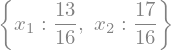

In [111]:
sympy.solve_linear_system(Linsys1, x1, x2)

### Linear Systems: Solving with SimPy (Linear System as Matrix representation A.x = b using LU Decomposition)

In [37]:
A = sympy.Matrix([[1, 3], [5, -1]])
b = sympy.Matrix([[4], [3]])

In [45]:
L, U, _ = A.LUdecomposition()

In [46]:
A.LUdecomposition()

⎛⎡1  0⎤  ⎡1   3 ⎤    ⎞
⎜⎢    ⎥, ⎢      ⎥, []⎟
⎝⎣5  1⎦  ⎣0  -16⎦    ⎠

In [47]:
L, U, L*U

⎛⎡1  0⎤  ⎡1   3 ⎤  ⎡1  3 ⎤⎞
⎜⎢    ⎥, ⎢      ⎥, ⎢     ⎥⎟
⎝⎣5  1⎦  ⎣0  -16⎦  ⎣5  -1⎦⎠

- two ways to solve

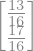

In [115]:
sol = A.solve(b)
sol

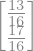

In [116]:
A.LUsolve(b)

---
# Numerical Solution of Equation(s)

## Nonlinear equation

- Nonlinear equations are usualy solved numerically since most of them have no analytical solution.
- Hence, we first try to use `sympy.solve` to solve analytically. In case no analytical solution, then we opt to numerical approach.

- Example: Find the root for $y = 25-x^2$:

In [55]:
x = sympy.symbols("x")
nl_eq1 = 25- x**2  
nl_sol1 =sympy.solve([nl_eq1], x,  dict =True)
nl_sol1

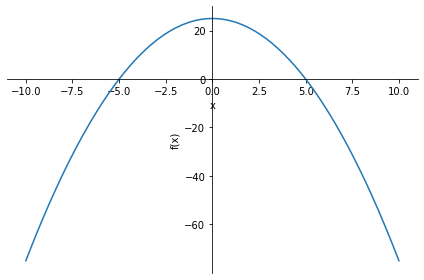

In [56]:
sympy.plot(nl_eq1, (x,-10 ,10));

 - check your solution

In [57]:
sympy.checksol(nl_eq1,nl_sol1[0]),sympy.checksol(nl_eq1,nl_sol1[1]),

(True, True)

- Example: There are multiple roots for $y = sin(x^2)$

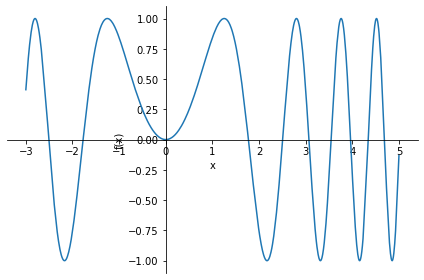

In [58]:
x= sympy.symbols("x")
nl_eq2 = sympy.sin(x**2)  
nl_sol2 =sympy.solve([nl_eq2], x, dict =True)
sympy.plot(nl_eq2, (x,-3 ,5));
nl_sol2

- example of no solution:  $y = x - cos(x)$:

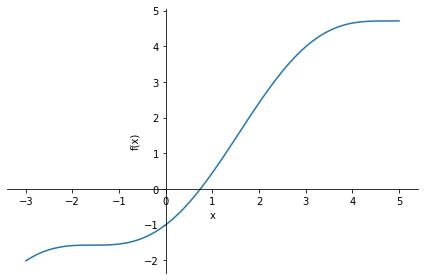

In [59]:
x= sympy.symbols("x")
nl_eq3 = x - sympy.cos(x)
sympy.plot(nl_eq3, (x,-3 ,5));

 - below will result with error as there is no analytical solution

In [1]:
#nl_sol3 =sympy.solve([nl_eq3], x, dict =True)
#nl_sol3

## Writing your own code: Bisection & Newton's method

- We can employ many techniques for numerical root finding.
- The underlying principle of numerical approach is, we apply an iterative scheme where the function is evaluated at successive points until the algorithm:
> 1. converges to the solution (the desired accuracy)
> 2. converges to a given number of iteration

Code adopted from:
1. Robert Johansson, Numerical Python: Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib (2019, Apress).
2. [John T. Foster, The University of Texas at Austin.](https://johnfoster.pge.utexas.edu/numerical-methods-book/NonlinearRootFinding.html)

### Bisection:(adopted from Johansson, 2019)

- Visualization of Bisection method

Root approximately at 0.687500, with 8 number of iterations


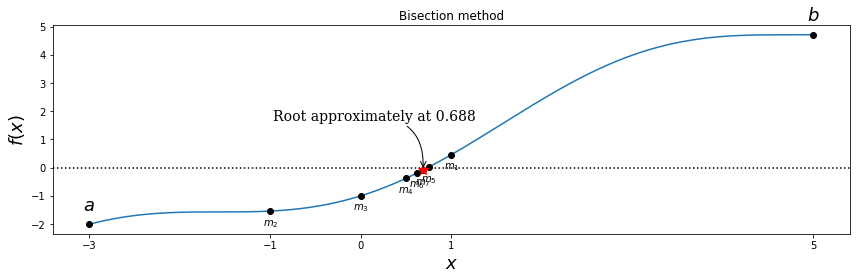

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# define a function, desired tolerance and starting interval [a, b]
f = lambda x: x - np.cos(x)
tol = 0.1
a, b = -3, 5


x = np.linspace(a, b, 1000)
#------------------------------
# graph the function f
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(x, f(x), lw=1.5)
ax.axhline(0, ls=':', color='k')
ax.set_xticks([a, -1, 0, 1, b])
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)

# find the root using the bisection method and visualize
# the steps in the method in the graph
fa, fb = f(a), f(b)

ax.plot(a, fa, 'ko')
ax.plot(b, fb, 'ko')
ax.text(a, fa + 0.5, r"$a$", ha='center', fontsize=18)
ax.text(b, fb + 0.5, r"$b$", ha='center', fontsize=18)

#---------- Bisection Method------------
n = 1
while b - a > tol:
    m = a + (b - a)/2
    fm = f(m)

    ax.plot(m, fm, 'ko')
    ax.text(m, fm - 0.5, r"$m_%d$" % n, ha='center')
    n += 1
    
    if np.sign(fa) == np.sign(fm):
        a, fa = m, fm
    else:
        b, fb = m, fm

#----------------------------------------
ax.plot(m, fm, 'r*', markersize=10)
ax.annotate("Root approximately at %.3f" % m,
            fontsize=14, family="serif",
            xy=(a, fm), xycoords='data',
            xytext=(-150, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Bisection method")

fig.tight_layout()
#fig.savefig('ch5-nonlinear-bisection.pdf')

print("Root approximately at %.6f," % m, "with %.f number of iterations"%n)

In [123]:
f(m)

### Bisection method adopted from [John T. Foster, The University of Texas at Austin.](https://johnfoster.pge.utexas.edu/numerical-methods-book/NonlinearRootFinding.html)

In [124]:
def bisection(f, a, b, max_iterations=10000, tolerence=1e-6):

    FA = f(a)

    for i in range(max_iterations):

        p = a + (b - a) / 2
        FP = f(p)

        if np.isclose(FP, 0.0) or (b - a) / 2 < tolerence:
            return p

        if np.sign(FA) * np.sign(FP) > 0:
            a = p
            FA = FP
        else:
            b = p

    return


- calling Bisection method

In [125]:
f = lambda x: x - np.cos(x)
a, b = -3, 5
sol = bisection(f,a,b)
sol, f(sol)

- controlling accuracy and number of iterations

In [126]:
sol = bisection(f,a,b,max_iterations=10000, tolerence=1e-20)
sol, f(sol)

### Using SciPy's Bisection method:

Signature:
optimize.bisect(
    f,
    a,
    b,
    args=(),
    xtol=2e-12,
    rtol=8.881784197001252e-16,
    maxiter=100,
    full_output=False,
    disp=True,
)

In [53]:
import numpy as np
from scipy import optimize

f = lambda x: x - np.cos(x)
sol = optimize.bisect(f, -3, 5)
sol, f(sol)

### Newton's Method

- Visualization of Newton's method

Root approximately at 1.000000, with 0 number of iterations
Root approximately at 0.750364, with 1 number of iterations
Root approximately at 0.739113, with 2 number of iterations
Root approximately at 0.739085, with 3 number of iterations
Root approximately at 0.739085, with 4 number of iterations


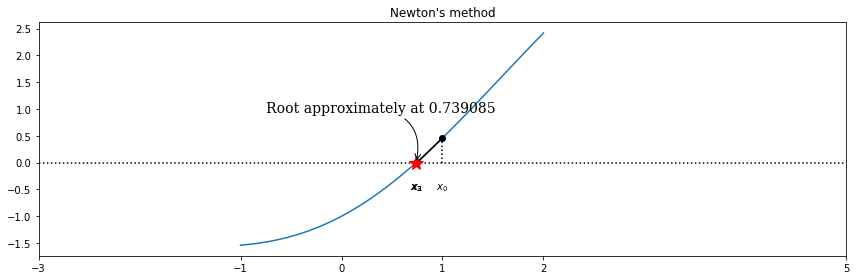

In [128]:
import numpy as np
from scipy import optimize

# define a function, desired tolerance and initial point xk
tol = 1e-10

f = lambda x: x - np.cos(x)
sol = optimize.bisect(f, -3, 5)
sol, f(sol)
xk = 1 #initial point xk

# setting up the function and its derivatives using sympy:
s_x = sympy.symbols("x")# the independent variable
s_f = s_x - sympy.cos(s_x) # the function

f = lambda x: sympy.lambdify(s_x, s_f, 'numpy')(x)
fp = lambda x: sympy.lambdify(s_x, sympy.diff(s_f, s_x), 'numpy')(x) # the function's first derivative

x = np.linspace(-1, 2, 1000)
#----------------------------------------
# setup a graph for visualizing the root finding steps
fig, ax = plt.subplots(1, 1, figsize=(12,4))

ax.plot(x, f(x))
ax.axhline(0, ls=':', color='k')
#----------------------------------------
# repeat Newton's method until convergence to the desired tolerance has been reached
n = 0
while f(xk) > tol:
    xk_new = xk - f(xk) / fp(xk) #Newton's method 
    
    ax.plot([xk, xk], [0, f(xk)], color='k', ls=':')
    ax.plot(xk, f(xk), 'ko')
    ax.text(xk, -.5, r'$x_%d$' % n, ha='center')
    ax.plot([xk, xk_new], [f(xk), 0], 'k-')
    print("Root approximately at %.6f," % xk, "with %.f number of iterations"%n)
    xk = xk_new
    n += 1

ax.plot(xk, f(xk), 'r*', markersize=15)
ax.annotate("Root approximately at %.6f" % xk,
            fontsize=14, family="serif",
            xy=(xk, f(xk)), xycoords='data',
            xytext=(-150, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Newton's method")
ax.set_xticks([-3,-1, 0, 1, 2,5])
fig.tight_layout()
#fig.savefig('ch5-nonlinear-newton.pdf')

print("Root approximately at %.6f," % xk, "with %.f number of iterations"%n)

In [129]:
xk, f(xk)

### Using SciPy's Newton's method:

In [130]:
import numpy as np
import sympy
from scipy import optimize

- Need to setup the function and its derivatives using sympy:

In [131]:
s_x = sympy.symbols("x")# the independent variable
s_f = s_x - sympy.cos(s_x) # the function

f = lambda x: sympy.lambdify(s_x, s_f, 'numpy')(x)
fp = lambda x: sympy.lambdify(s_x, sympy.diff(s_f, s_x), 'numpy')(x) # the function's first derivative

In [132]:
x_initial_guess = 1
sol = optimize.newton(f, x_initial_guess, fprime = fp)
sol, f(sol)

- without the derivative, **secant method** will be executed

In [133]:
x_initial_guess = 1
sol = optimize.newton(f, x_initial_guess)
sol, f(sol)

- disadvantages of Newton's Method: 
1. very sensitive to initial value,
2. root finding is problematic if there are multiple roots, hence you might not catch the one that you desire.

- Other well known modified bisection methods: Return float, a zero of f between a and b. f must be a continuous function, and [a,b] must be a sign changing interval.

> 1. Brent method: optimize.brentq(f, a, b): 
> 2. variation of Brent method: optimize.brenth(f, a, b): 

In [134]:
sol = optimize.brentq(f, -2, 5)
sol, f(sol)

In [135]:
sol = optimize.brenth(f, -2, 5)
sol, f(sol)

In [136]:
sol = optimize.ridder(f, -2, 5)
sol, f(sol)

## Nonlinear Systems

- We cannot in general write a system of nonlinear equations as a matrix-vector multiplication, instead we represent as a vector-valued function, for example, $f : R^N \rightarrow R^N$, that takes an N-dimensional vector and maps it to another N-dimensional vector.

- Hence, its not a direct method like solving a nonlinear function. We need to setup extra conditions to get the desired solution.

- First, try to use `sympy.solve` to solve analytically before opting to numerical approach.

Example, with an analytical solution: 
$$
f(x,y) = x^2 + y - 2
$$

$$
f(x,y) = y^2  - 4
$$

In [60]:
x, y = sympy.symbols("x, y")
nl_eq1 = x**2 + y - 2
nl_eq2 = y**2 - 4
nl_sol =sympy.solve([nl_eq1, nl_eq2], x, y, dict =True) # solution displayed in the form of tuple
nl_sol

- the fourth sol

In [138]:
nl_sol[3]

- two ways to verify your answer: 

In [139]:
nl_eq1.subs({x:-2,y:-2}), nl_eq1.subs(nl_sol[0])

In [140]:
sympy.checksol(nl_eq1,nl_sol[0]), sympy.checksol(nl_eq2,nl_sol[0] )

(True, True)

---

Example, with **no analytical solution**: 
$$
f(x_1,x_2) = 2x_2 + cos(x_1) - 2
$$

$$
f(x_1,x_2) = x_2 + x_1^2 - 2
$$

In [63]:
import sympy

x, y = sympy.symbols("x, y")
nl_eq1 = 2*y + sympy.cos(x) - 2
nl_eq2 = y + 4*x -2
#nl_sol =sympy.solve([nl_eq1, nl_eq2], x, y, dict =True)
#nl_sol

- let's visually check the solution, we rewrite for plotting:
$$
x_2 = 1 - cos(x_1)/2
$$

$$
x_2  = 2 - x_1^2 
$$

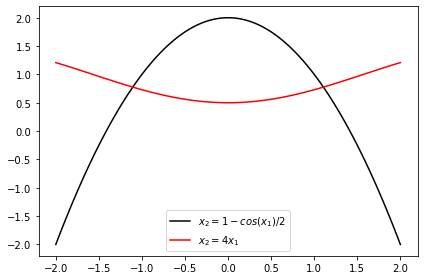

In [142]:
x = np.linspace(-2,2,100)

eq1 = lambda x:  1 - np.cos(x)/2
eq2 = lambda x:  2-x**2
fig, ax = plt.subplots()
ax.plot(x, eq2(x), 'k', label='$x_2 =  1 - cos(x_1)/2$')
ax.plot(x, eq1(x), 'r', label='$x_2 = 4x_1$')
ax.legend(loc=0)
fig.tight_layout()

 - we can use `scipy.optimize.fsolve()` this solve this nonlinear equation using modified Powell hybrid method.  
 - It returns the roots of the (non-linear) equations defined by func(x)=0 given a starting estimate.
 
- Ref see: [MINPACK’s hybrd and hybrj algorithms] (http://www.netlib.org/minpack/ex/file03).

> **HYBRD** is a modification of the Powell hybrid method. Two of its main characteristics involve the choice of the correction as a convex combination of the Newton and scaled gradient directions, and the updating of the Jacobian by the rank-1 method of Broyden. The choice of the correction guarantees (under reasonable conditions) global convergence for starting points far from the solution and a fast rate of convergence. The Jacobian is approximated by forward differences at the starting point, but forward differences are not used again until the rank-1 method fails to produce satisfactory progress.

> **HYBRJ** is a modification of the Powell hybrid method. Two of its main characteristics involve the choice of the correction as a convex combination of the Newton and scaled gradient directions, and the updating of the Jacobian by the rank-1 method of Broyden. The choice of the correction guarantees (under reasonable conditions) global convergence for starting points far from the solution and a fast rate of convergence. The Jacobian is calculated at the starting point, but it is not recalculated until the rank-1 method fails to produce satisfactory progress.

 - First setup the system of nonlinear equation in the form of a  matrix $f =[f_1, f_2]$, where $x = [x_1, x_2]^T$ is in the form of a Python list:
 
$$
\begin{bmatrix}
2 x_{2} + \cos{(x_{1})} - 2, & x_{1}^{2} + x_{2} - 2
\end{bmatrix}
$$

In [64]:
import numpy as np
from scipy.optimize import fsolve

def func(x):
    return [2*x[1] + np.cos(x[0]) - 2,
            x[1] + x[0]**2 - 2]


Signature:
fsolve(
    func,
    x0,
    args=(),
    fprime=None,
    full_output=0,
    col_deriv=0,
    xtol=1.49012e-08,
    maxfev=0,
    band=None,
    epsfcn=None,
    factor=100,
    diag=None,
)

- try evaluating at $x_1 = 1, x_2 =2$:

In [144]:
func([1,2])

In [145]:
root1 = fsolve(func, [1, 0])
root1

array([1.10633256, 0.77602828])

In [146]:
root2 = fsolve(func, [-1, 0])
root2

array([-1.10633256,  0.77602828])

In [147]:
np.isclose(func(root1), [0.0, 0.0]), np.isclose(func(root2), [0.0, 0.0])   # func(root) should be almost 0.0.

(array([ True,  True]), array([ True,  True]))

In [148]:
root1, func(root1), root1, func(root2)

(array([1.10633256, 0.77602828]),
 [-1.7896795156957523e-13, 7.176481631177012e-13],
 array([1.10633256, 0.77602828]),
 [-1.7896795156957523e-13, 7.176481631177012e-13])

- Giving the derivatives in the form of a Jacobian matrix:
$$
\mathbf{f}_{i,j} =
\begin{bmatrix}
  \frac{\partial f_1}{\partial x_1} & 
    \frac{\partial f_1}{\partial x_2} \\[1ex] % <-- 1ex more space between rows of matrix
  \frac{\partial f_2}{\partial x_1} & 
    \frac{\partial f_2}{\partial x_2}
\end{bmatrix}
$$

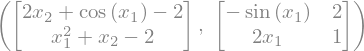

In [149]:
x1, x2 = sympy.symbols("x1, x2")

f_mat = sympy.Matrix([2*x2 + sympy.cos(x1) - 2, x2 + x1**2 - 2])
f_mat_j = f_mat.jacobian(sympy.Matrix([x1, x2]))
f_mat , f_mat_j

In [150]:
def f_jacobian(x):
    return [[-1*np.sin(x[0]), 2], [2*x[0], 1]]

In [151]:
root1p = fsolve(func, [1, 0], fprime = f_jacobian)
root1p, func(root1p)

(array([1.10633256, 0.77602828]),
 [-1.7918999617450027e-13, 7.176481631177012e-13])

In [152]:
root2p = fsolve(func, [-1, 0], fprime = f_jacobian)
root2p, func(root2p)

(array([-1.10633256,  0.77602828]),
 [-1.7918999617450027e-13, 7.176481631177012e-13])

- Visualization of the initial and final roots

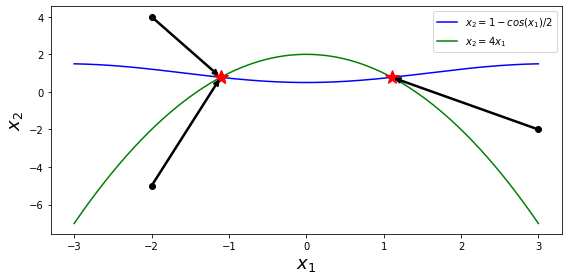

In [153]:
'''def func(x):
    return [2*x[1] + np.cos(x[0]) - 2,
            x[1] + x[0]**2 - 2]'''

x = np.linspace(-3, 3, 5000)

y1 = lambda x:  1 - np.cos(x)/2
y2 = lambda x:  2-x**2


fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y1(x), 'b', lw=1.5, label='$x_2 =  1 - cos(x_1)/2$')
ax.plot(x, y2(x), 'g', lw=1.5, label=r'$x_2 = 4x_1$')

x_guesses = [[-2, 4], [3, -2], [-2, -5]]
for x_guess in x_guesses:
    sol = optimize.fsolve(func, x_guess)
    ax.plot(sol[0], sol[1], 'r*', markersize=15)

    ax.plot(x_guess[0], x_guess[1], 'ko')
    ax.annotate("", xy=(sol[0], sol[1]), xytext=(x_guess[0], x_guess[1]),
                arrowprops=dict(arrowstyle="->", linewidth=2.5))
    
ax.legend(loc=0)
ax.set_xlabel(r'$x_1$', fontsize=18)
ax.set_ylabel(r'$x_2$', fontsize=18)
fig.tight_layout()
#fig.savefig('nonlinear-system.pdf')